In [1]:
from scipy import ndimage as ndi
from sklearn.cluster import MeanShift
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from scipy import fftpack

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()


In [2]:
image = img_as_float(io.imread('Patterns/0_000.bmp'))

In [3]:
image_fft = fftpack.fft2(image)

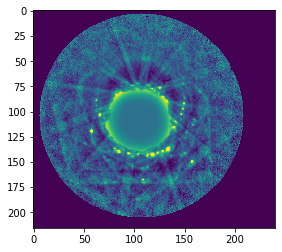

In [4]:
plt.imshow(image)

Text(0.5, 1.0, 'Fourier transform')

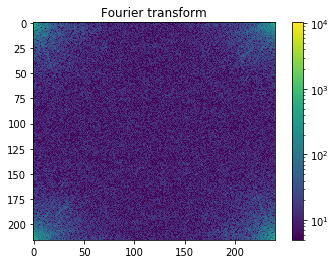

In [5]:
plot_spectrum(image_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

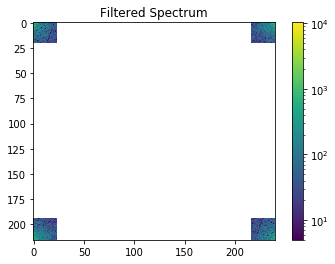

In [8]:
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
image_fft2 = image_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = image_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(image_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

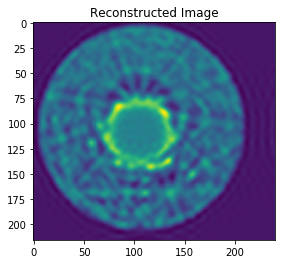

In [9]:
image_new = fftpack.ifft2(image_fft2).real

plt.figure()
plt.imshow(image_new)
plt.title('Reconstructed Image')